In [1]:
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.sparse import eye, diags
import numpy as np

In [91]:
N=10000
hamiltonian=diags(np.linspace(-1, 1, N))
Emin, Emax=-1, 1

In [167]:
def F_operator(ham, Emax, a):
    Emax=Emax+0.01
    E0 = (Emax**2 - a**2)/2
    Ec = (Emax**2 + a**2)/2
    return (ham @ ham - eye(ham.shape[0]) * Ec)/E0

a=0.05

F=F_operator(hamiltonian, np.max(np.abs([Emin, Emax])), a=a)

In [168]:
def chebyshev(ψ , ham, k):
    if k==0:
        return ψ
    else:
        for i in range(k):
            if i==0:
                ψ_n=ψ
                continue
            if i==1:
                ψ_nm1=ψ_n
                ψ_n=ham@ψ_nm1
                continue
            ψ_np1=2*ham@ψ_n - ψ_nm1
            ψ_nm1=ψ_n
            ψ_n=ψ_np1
        return ψ_n

In [169]:
K=int(12 * np.max(np.abs([Emin, Emax])) / a)
ψ=np.random.rand(hamiltonian.shape[0])
ψ=ψ/np.linalg.norm(ψ)
T_K_ψ=chebyshev(ψ, F, K)

In [170]:
T_K_ψ=T_K_ψ/np.linalg.norm(T_K_ψ)

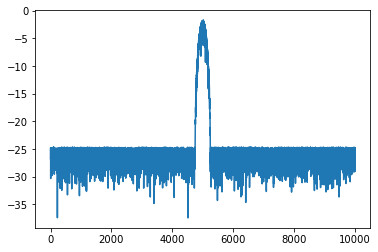

In [171]:
plt.plot(np.log(np.abs(T_K_ψ)))

In [172]:
def G_operator(ham, Emax, Emin, a):
    Emax=Emax+0.05
    Emin=Emin-0.05
    E0 = (Emax - Emin)/2
    Ec = (Emax + Emin)/2
    return (ham - eye(ham.shape[0]) * Ec)/E0

In [173]:
d = int(1.5 * 2 * N * a / Emax)
n=int((d * 1.5 - 1) / 2)
a_r = a / np.max(np.abs([Emin, Emax]))
K_d=int(n * np.pi / a_r)
K_d=d
G=G_operator(hamiltonian, Emax, Emin, a)
evolution=[]
m=1
while int(m * np.pi / a_r) < K_d:
    k=int(m * np.pi / a_r)
    v=chebyshev(T_K_ψ, G, k)
    v=v/np.linalg.norm(v)
    evolution.append(v)
    m+=1

# for n in range(K_d):
#     v=chebyshev(T_K_ψ, G, k)
#     v=v/np.linalg.norm(v)
#     evolution.append(v)
evolution=np.asarray(evolution)

In [174]:
n = evolution.shape[0]
H_sub=np.zeros((n, n))
S_sub=np.zeros((n, n))
for i in range(n):
    for j in range(n):
        v_i = evolution[i]
        v_j = evolution[j]
        H_sub[i, j]=np.dot(v_i.conj(), hamiltonian @ v_j)
        S_sub[i, j]=np.dot(v_i.conj(), v_j)

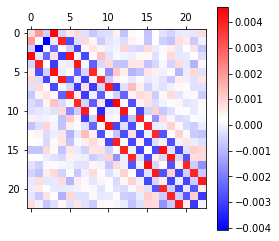

In [175]:
plt.matshow(H_sub, cmap='bwr')
plt.colorbar()
plt.show()

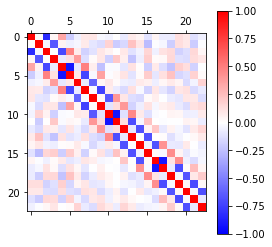

In [176]:
plt.matshow(S_sub, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [177]:
import scipy.linalg as la
eigvals = la.eigvals(H_sub, S_sub)

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.05, 0.05)

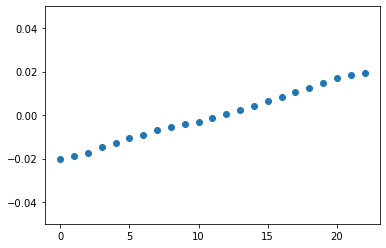

In [178]:
plt.plot(np.sort(eigvals), 'o')
plt.ylim(-a, a)

In [154]:
import kwant

dos = kwant.kpm.SpectralDensity(
    H_sub,
    mean=True,
#     bounds=(-a, a)
)

/opt/conda/lib/python3.9/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:536: ComplexWarning: Casting complex values to real discards the imaginary part
  self._arpack_solver(self.ido, self.bmat, self.which, self.k,


/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


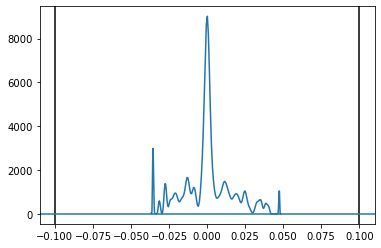

In [155]:
plt.plot(*dos())
plt.axvline(-a, c='k')
plt.axvline(a, c='k')
# plt.xlim(-a, a)
# plt.ylim(-1e59, 1e59)
plt.axhline(0)
plt.show()

In [156]:
import kwant

dos = kwant.kpm.SpectralDensity(
    hamiltonian,
    vector_factory=evolution,
    num_vectors=None,
    mean=True,
    bounds=(-1, 1),
    energy_resolution=0.001
)

In [157]:
np.shape(evolution)

(95, 10000)

(-0.1, 0.1)

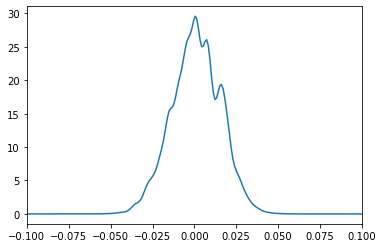

In [158]:
plt.plot(*dos())
plt.xlim(-a, a)